In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from credentials.config import viz_output_path

In [3]:
df = pd.read_csv('../data/meta_scrape.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        63 non-null     object 
 1   year        63 non-null     int64  
 2   week_num    63 non-null     int64  
 3   album       63 non-null     object 
 4   artist      63 non-null     object 
 5   meta_score  63 non-null     int64  
 6   user_score  63 non-null     int64  
 7   crit_num    59 non-null     float64
 8   user_num    63 non-null     int64  
 9   label       59 non-null     object 
 10  genre       63 non-null     object 
dtypes: float64(1), int64(5), object(5)
memory usage: 5.5+ KB


AttributeError: 'AxesSubplot' object has no attribute 'show'

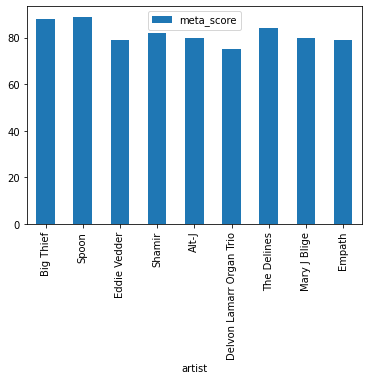

In [17]:
df_for_week = df.loc[df['week_num']==6]
df_for_week.head()
ax = df_for_week.plot.bar(x='artist', y='meta_score', rot=90)

In [5]:
# seprete rows with nulls from df 
df_nulls = df[df.isnull().any(axis=1)]
df_clean = df.dropna(inplace=False)

In [5]:
# clean genre lists
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 0 to 80
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        77 non-null     object 
 1   year        77 non-null     int64  
 2   week_num    77 non-null     int64  
 3   album       77 non-null     object 
 4   artist      77 non-null     object 
 5   meta_score  77 non-null     int64  
 6   user_score  77 non-null     int64  
 7   crit_num    77 non-null     float64
 8   user_num    77 non-null     int64  
 9   label       77 non-null     object 
 10  genre       77 non-null     object 
dtypes: float64(1), int64(5), object(5)
memory usage: 7.2+ KB


In [6]:
# bin by scores

bins = [0, 69, 79, 89, 100]
group_names=['mixed', '70s', '80s', '90s']
df["score_groups"] = pd.cut(df["meta_score"], bins, labels=group_names, include_lowest=True)
df.tail()

,date,year,week_num,album,artist,meta_score,user_score,crit_num,user_num,label,genre,score_groups
76,"January 7, 2022",2022,1,Transparency,Twin Atlantic,66,50,6.0,10,Believe,['Pop/Rock'],mixed
77,"January 7, 2022",2022,1,Dawn FM,The Weeknd,88,91,24.0,837,Republic,"['Pop', 'R&B', 'Contemporary R&B', 'Alternativ...",80s
78,"January 7, 2022",2022,1,Now Or Whenever,Spector,72,71,4.0,7,NaN,"['Pop/Rock', 'Indie Rock']",70s
79,"January 7, 2022",2022,1,DS4EVER,Gunna,51,53,5.0,5,300 Entertainment,"['Rap', 'Contemporary Rap']",mixed
80,"January 6, 2022",2022,1,Antidawn EP,Burial,81,64,6.0,7,Hyperdub,"['Electronic', 'Ambient', 'Pop/Rock', 'Experim...",80s


In [7]:
# seprete rows with nulls from df 
df_nulls = df[df.isnull().any(axis=1)]
df_clean = df.dropna(inplace=False)

<Figure size 7200x2880 with 0 Axes>

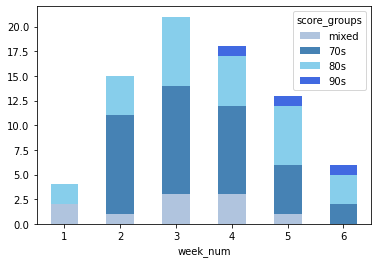

<Figure size 432x288 with 0 Axes>

In [8]:
# stacked bar chart-multi-indexed on weeknum and score groups

df_by_week_bin = df_clean.groupby(['week_num', 'score_groups']).count().fillna(0)
plt.figure(figsize = (100,40))
df_by_week_bin['album'].unstack().plot(kind='bar', stacked=True, color=['lightsteelblue', 'steelblue','skyblue','royalblue'])
plt.xticks(rotation=360)
plt.show()
plt.savefig(viz_output_path + '\\scrape_stacked_score.png')

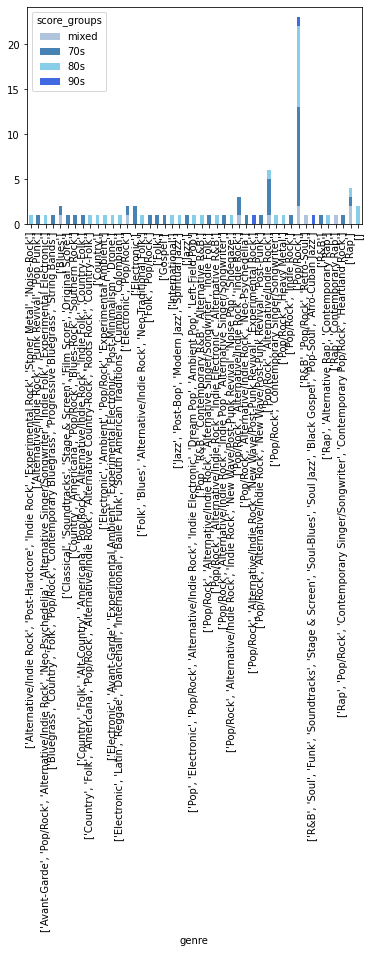

In [9]:
# need a plan for genre, tricky subject, possibly mongo?

df_by_genre_bin = df.groupby(['genre', 'score_groups']).count().fillna(0)

df_by_genre_bin['album'].unstack().plot(kind='bar', stacked=True, color=['lightsteelblue', 'steelblue','skyblue','royalblue'])
plt.xticks(rotation=90)
plt.savefig(viz_output_path + '\\scrape_stacked_genre.png')

In [10]:
# labels with more than one entery
label_2plus = df['label'].value_counts().loc[lambda x : x>1]
label_2plus

Republic      3
Interscope    2
No Quarter    2
City Slang    2
Ninja Tune    2
Domino        2
Name: label, dtype: int64

In [11]:
# create df for labels with more than one entry
grouped_label = df.groupby('label')
multi_album_label = grouped_label.filter(lambda x: x['score_groups'].nunique() > 1.)
multi_album_label

,date,year,week_num,album,artist,meta_score,user_score,crit_num,user_num,label,genre,score_groups
2,"February 11, 2022",2022,6,Earthling,Eddie Vedder,79,0,12.0,0,Republic,['Pop/Rock'],70s
7,"February 4, 2022",2022,5,Let the Festivities Begin!,Los Bitchos,74,0,7.0,0,City Slang,"['Pop/Rock', 'Alternative/Indie Rock']",70s
15,"February 4, 2022",2022,5,Ants From Up There,Black Country New Road,92,95,20.0,87,Ninja Tune,"['Pop/Rock', 'Alternative/Indie Rock', 'New Wa...",90s
33,"January 28, 2022",2022,4,Aboogi,Imarhan,86,0,4.0,0,City Slang,['International'],80s
54,"January 21, 2022",2022,3,Optimism,Jana Horn,81,0,4.0,0,No Quarter,['Pop/Rock'],80s
55,"January 21, 2022",2022,3,Strictly a One-Eyed Jack,John Mellencamp,70,0,5.0,0,Republic,"['Rap', 'Pop/Rock', 'Contemporary Singer/Songw...",70s
62,"January 14, 2022",2022,2,Fragments,Bonobo,74,69,15.0,15,Ninja Tune,"['Electronic', 'Pop/Rock']",70s
64,"January 14, 2022",2022,2,Dodging Dues,Garcia Peoples,78,0,5.0,0,No Quarter,"['Pop/Rock', 'Alternative/Indie Rock', 'Indie ...",70s
77,"January 7, 2022",2022,1,Dawn FM,The Weeknd,88,91,24.0,837,Republic,"['Pop', 'R&B', 'Contemporary R&B', 'Alternativ...",80s


<Figure size 28800x5760 with 0 Axes>

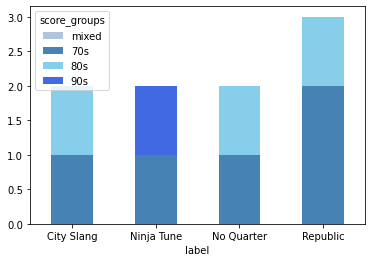

<Figure size 432x288 with 0 Axes>

In [12]:
# stacked chart for binned ratings by label with more than one album
df_label_bin = multi_album_label.groupby(['label', 'score_groups']).count()
df_label_bin
plt.figure(figsize = (400, 80))
df_label_bin['album'].unstack().plot(kind='bar', stacked=True, color=['lightsteelblue', 'steelblue','skyblue','royalblue'])
plt.xticks(rotation=360)
plt.show()
plt.savefig(viz_output_path + '\\label_stacked_score.png')

In [13]:
# sorting df by number of critic reviews and selecting the top 30
df_clean
num_reviews_df = df_clean.sort_values(by=['crit_num'], ascending=False)
top_30_reviews_df = num_reviews_df.head(30)
top_30_reviews_df

,date,year,week_num,album,artist,meta_score,user_score,crit_num,user_num,label,genre,score_groups
14,"February 4, 2022",2022,5,Laurel Hell,Mitski,83,88,26.0,40,Dead Oceans,['Pop/Rock'],80s
13,"February 4, 2022",2022,5,Time Skiffs,Animal Collective,76,88,24.0,20,Domino,['Pop/Rock'],70s
77,"January 7, 2022",2022,1,Dawn FM,The Weeknd,88,91,24.0,837,Republic,"['Pop', 'R&B', 'Contemporary R&B', 'Alternativ...",80s
0,"February 11, 2022",2022,6,Dragon New Warm Mountain I Believe in You,Big Thief,88,92,20.0,10,4AD,['Pop/Rock'],80s
15,"February 4, 2022",2022,5,Ants From Up There,Black Country New Road,92,95,20.0,87,Ninja Tune,"['Pop/Rock', 'Alternative/Indie Rock', 'New Wa...",90s
16,"February 4, 2022",2022,5,Pompeii,Cate Le Bon,85,88,19.0,8,Mexican Summer,['Pop/Rock'],80s
41,"January 21, 2022",2022,3,The Overload,Yard Act,85,78,17.0,9,Island,['Pop/Rock'],80s
61,"January 14, 2022",2022,2,Covers,Cat Power,79,77,16.0,6,Domino,['Pop/Rock'],70s
63,"January 14, 2022",2022,2,The Boy Named If,Elvis Costello the Imposters,83,80,15.0,11,Capitol,['Pop/Rock'],80s
66,"January 14, 2022",2022,2,Sick!,Earl Sweatshirt,86,75,15.0,55,Warner Music,"['Rap', 'Alternative Rap', 'Contemporary Rap']",80s


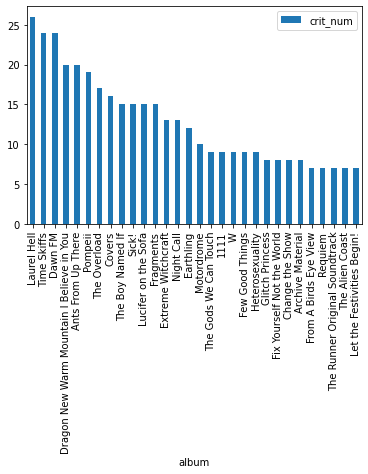

In [14]:
# top 30 albums by count of critic reviews
ax = top_30_reviews_df.plot.bar(x='album', y='crit_num', rot=90)

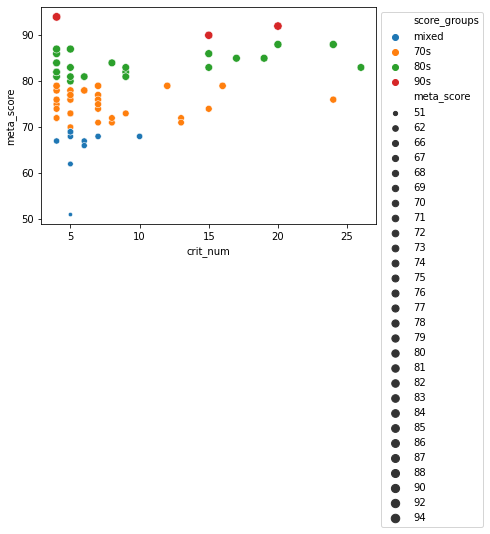

In [15]:
sns.scatterplot(data=df_clean, x="crit_num", y="meta_score", size="meta_score", hue="score_groups", legend="full")
plt.legend(loc =2, bbox_to_anchor = (1,1))

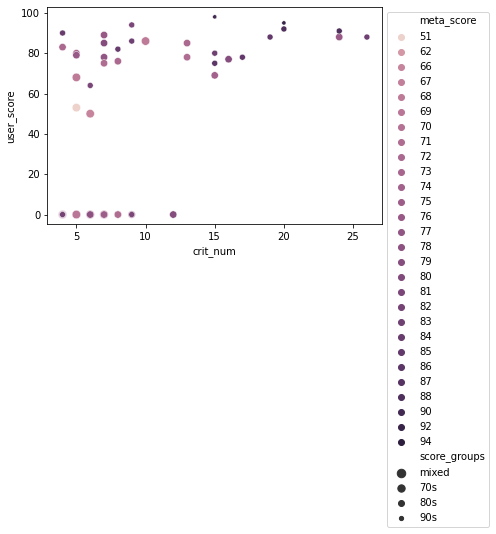

In [16]:
sns.scatterplot(data=df_clean, x="crit_num", y="user_score", size="score_groups", hue="meta_score", legend="full")
plt.legend(loc =2, bbox_to_anchor = (1,1))

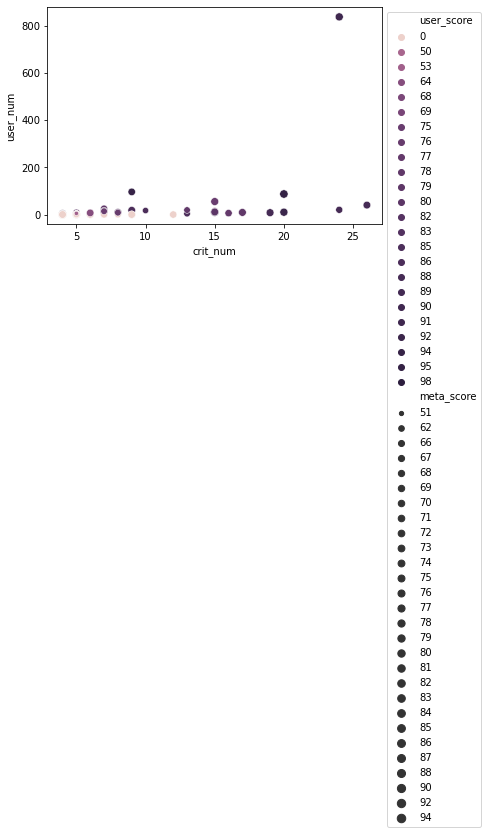

In [17]:
sns.scatterplot(data=df_clean, x="crit_num", y="user_num", size="meta_score", hue="user_score", legend="full")
plt.legend(loc =2, bbox_to_anchor = (1,1))

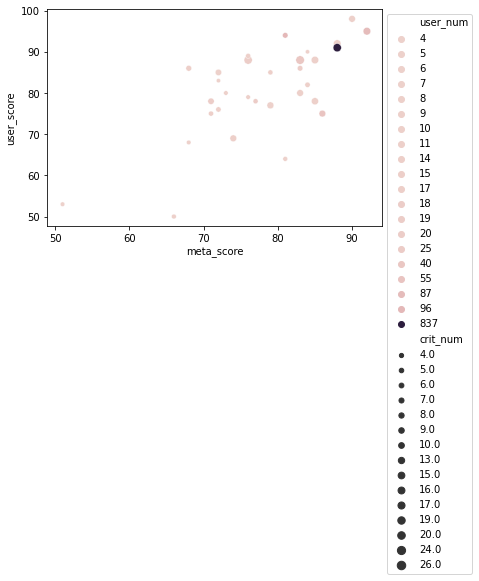

In [21]:
df_user_scores = df_clean.loc[df_clean['user_score'] !=0]
df_user_scores
sns.scatterplot(data=df_user_scores, x="meta_score", y="user_score", size="crit_num", hue="user_num", legend="full")
plt.legend(loc =2, bbox_to_anchor = (1,1))

In [58]:
import csv
import numpy as np


week_num=6
scrape_dict = {
    'scores': [],
    'albumlst': [],
    'artistlst': []
}
file_path = ('..//data//clean_meta_scrape.csv')
with open(file_path) as csvfile:
    reader = csv.DictReader(csvfile, delimiter=',')
    for row in reader:
        print(row)
        if int(row['week_num']) == 5:
            scrape_dict['scores'].append(row['meta_score'])
            scrape_dict['albumlst'].append(row['album'])
            scrape_dict['artistlst'].append(row['artist']) 
            



{'album': 'Time Skiffs', 'artist': 'Animal Collective', 'date': 'February 4, 2022', 'year': '2022', 'week_num': '5', 'meta_score': '76', 'user_score': '0', 'img': 'https://static.metacritic.com/images/products/music/6/ea784f82710802ee47d2293394e451fe-98.jpg', 'crit_num': '7', 'user_num': '0', 'label': 'Domino', 'genre': 'Pop/Rock'}
{'album': 'Laurel Hell', 'artist': 'Mitski', 'date': 'February 4, 2022', 'year': '2022', 'week_num': '5', 'meta_score': '85', 'user_score': '0', 'img': 'https://static.metacritic.com/images/products/music/8/871949bd90b6f2e8913a264e762ed500-98.jpg', 'crit_num': '10', 'user_num': '0', 'label': 'Dead Oceans', 'genre': 'Pop/Rock'}
{'album': 'Ants From Up There', 'artist': 'Black Country New Road', 'date': 'February 4, 2022', 'year': '2022', 'week_num': '5', 'meta_score': '91', 'user_score': '0', 'img': 'https://static.metacritic.com/images/products/music/8/9c17fee3e23f4595f9a424bbc57f055a-98.jpg', 'crit_num': '6', 'user_num': '0', 'label': 'Ninja Tune', 'genre':

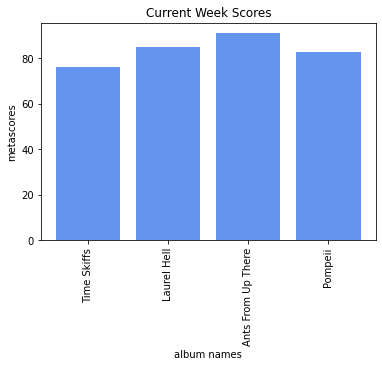

In [85]:

scores = [float(x) for x in scrape_dict['scores']]

albums = scrape_dict['albumlst']



plt.bar(albums, scores, color='cornflowerblue')

plt.xticks(rotation = 90)

plt.xlabel('album names')
plt.ylabel('metascores')
plt.title('Current Week Scores')
plt.show()


# plt.bar(x_position, scrape_dict['scores'], color = 'cornflowerblue')


# plt.xticks(x_position, scrape_dict['albumlst'], rotation='vertical')
# plt.ylim((0,100))
# plt.show()

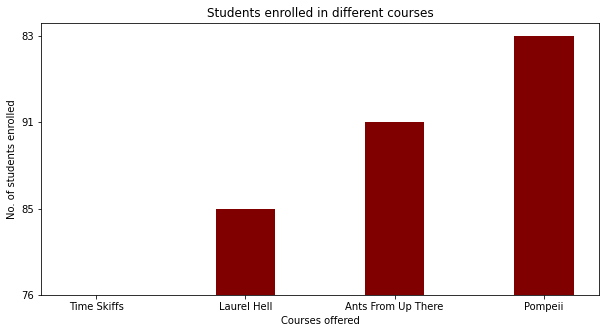

In [72]:
# creating the dataset
data = {'C':20, 'C++':15, 'Java':30,
        'Python':35}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")
plt.show()